Using label column: Class
Benign: 10876
Malicious: 10876


C:\Users\saiad\AppData\Local\Temp\ipykernel_21936\2782116510.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[label_column] = df[label_column].replace({


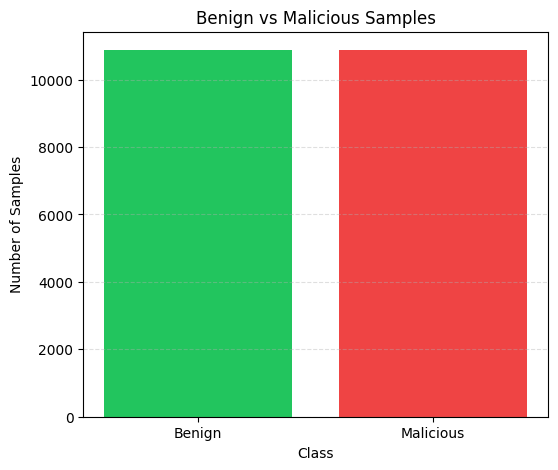

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("data/malware_dataset.csv")  

label_column = None

possible_labels = ["Benign", "Class", "Category"]

for col in possible_labels:
    if col in df.columns:
        label_column = col
        break

if not label_column:
    raise ValueError("No valid label column found! Expected one of: Benign, Class, Category")

print(f"Using label column: {label_column}")

df[label_column] = df[label_column].replace({
    "Benign": 0,
    "Malware": 1,
    "benign": 0,
    "malware": 1,
    "Ransomware": 1
}).astype(int)

counts = df[label_column].value_counts().sort_index()
benign_count = counts.get(0, 0)
malicious_count = counts.get(1, 0)

print("Benign:", benign_count)
print("Malicious:", malicious_count)

plt.figure(figsize=(6, 5))
plt.bar(["Benign", "Malicious"], [benign_count, malicious_count], 
        color=["#22c55e", "#ef4444"])

plt.title("Benign vs Malicious Samples")
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.show()


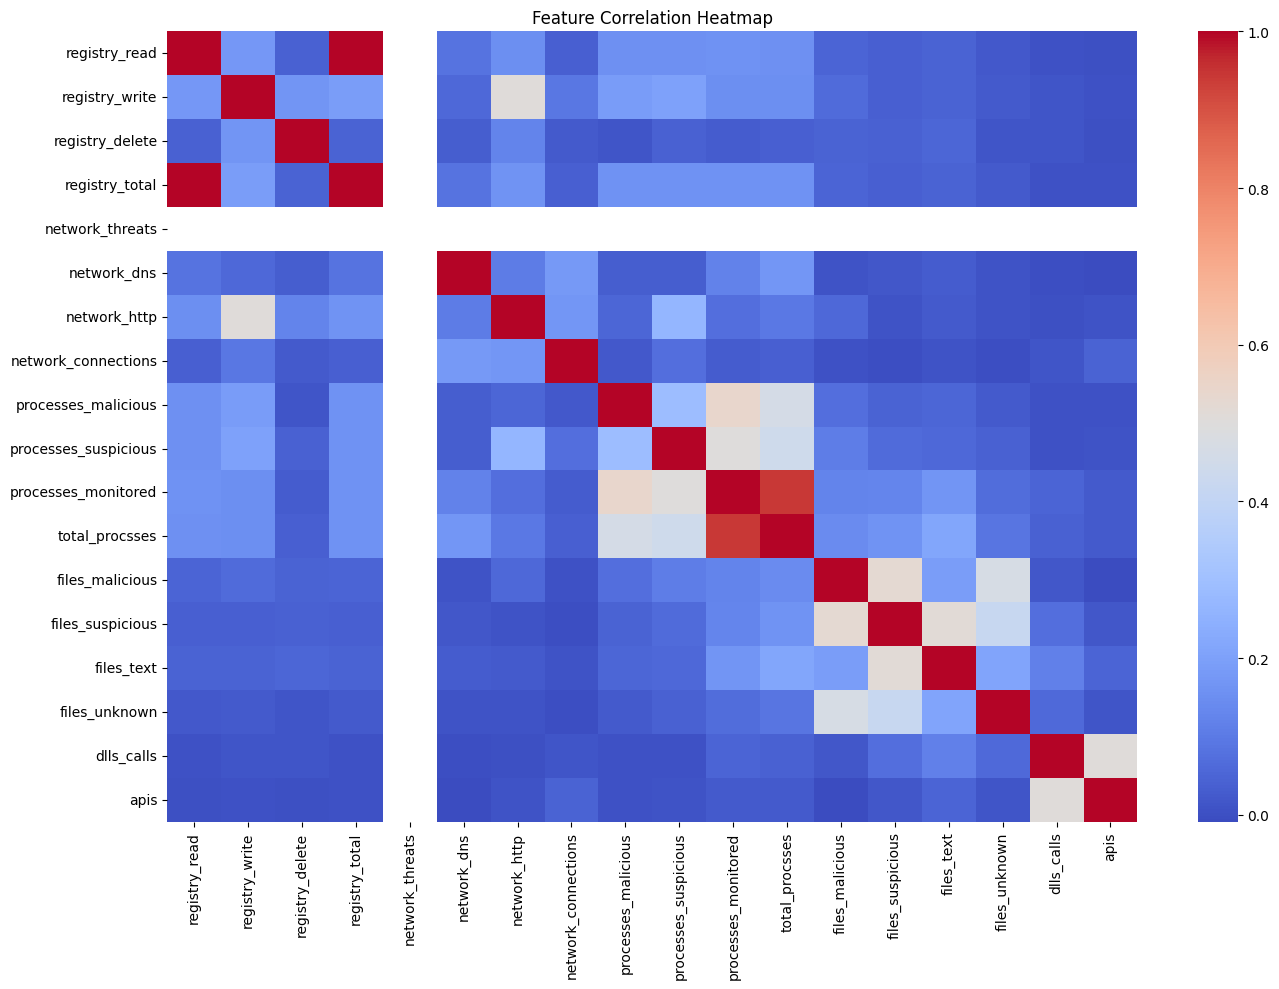

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data/malware_dataset.csv")

# Select numeric columns only
num_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(14,10))
sns.heatmap(num_df.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()


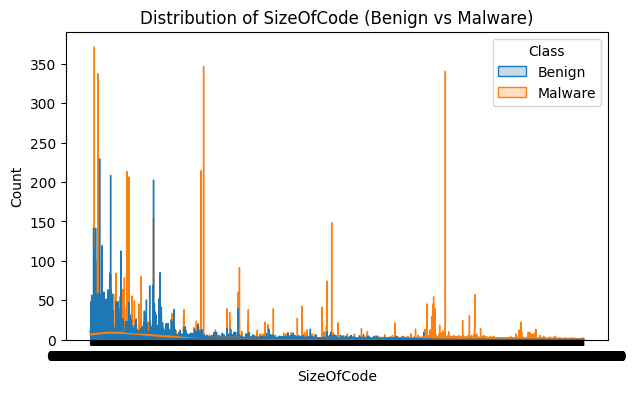

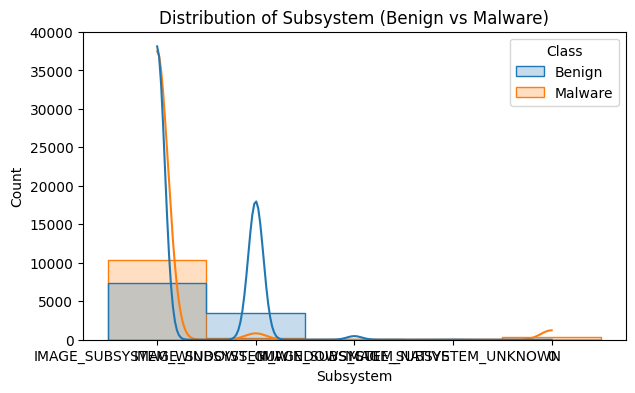

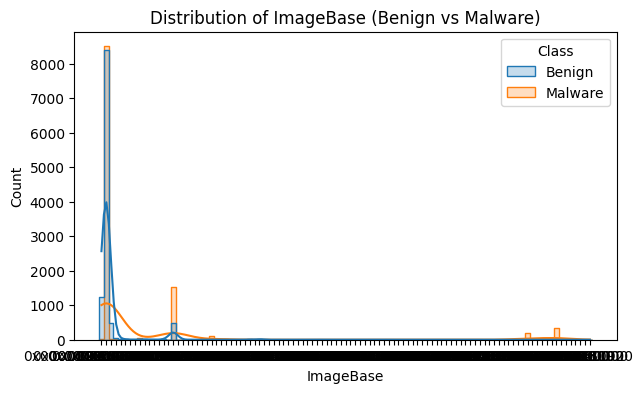

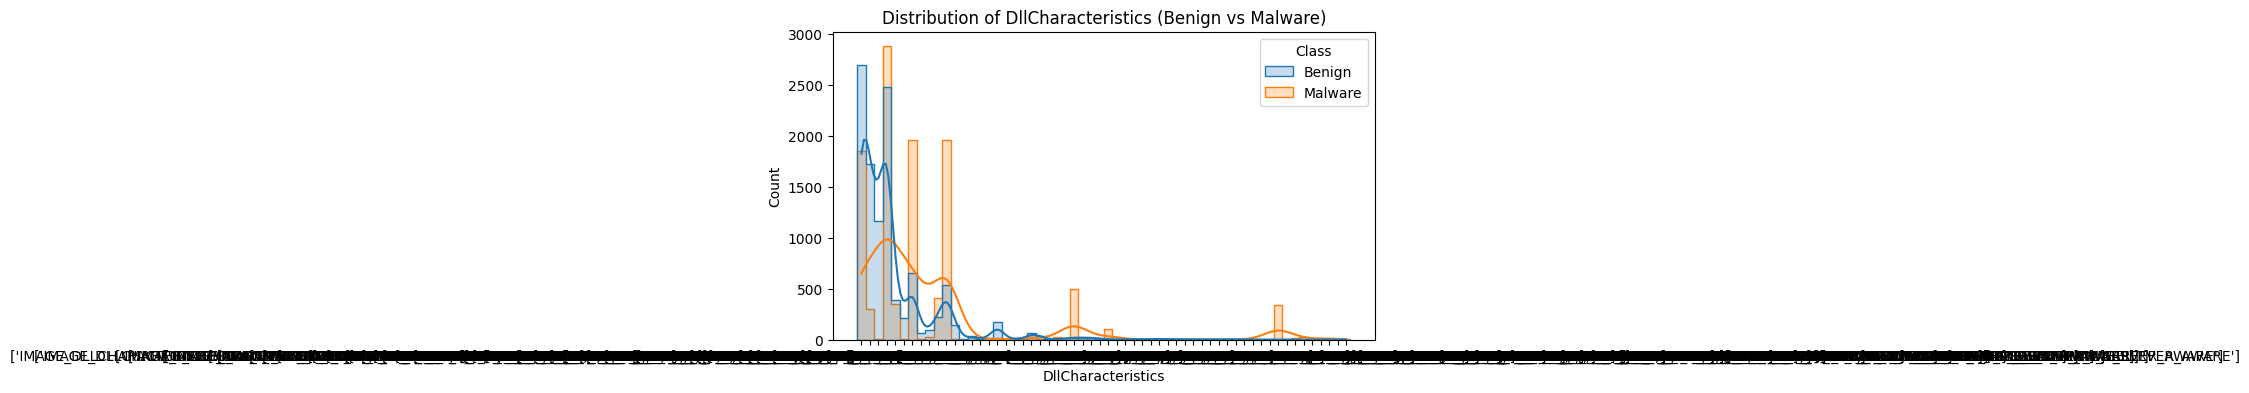

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

important_features = ["SizeOfCode", "Subsystem", "ImageBase", "DllCharacteristics"]

for feat in important_features:
    if feat in df.columns:
        plt.figure(figsize=(7,4))
        sns.histplot(data=df, x=feat, hue="Class", kde=True, element="step")
        plt.title(f"Distribution of {feat} (Benign vs Malware)")
        plt.show()


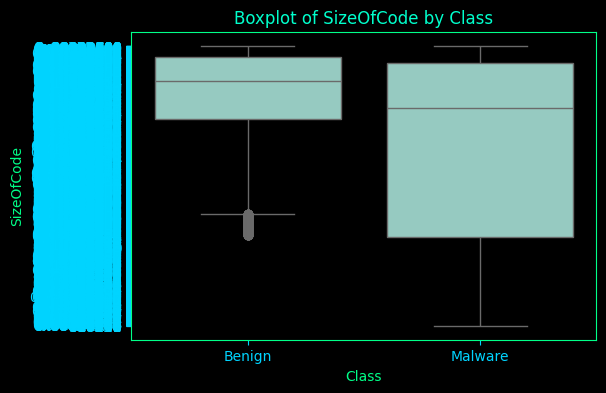

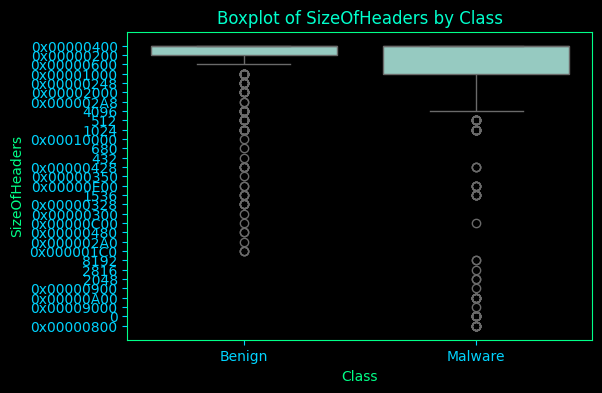

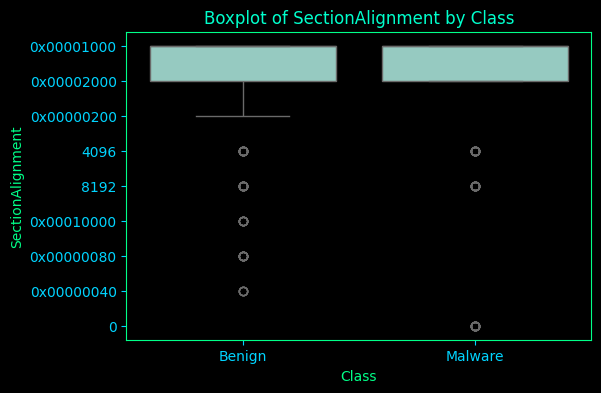

In [14]:
features_to_plot = ["SizeOfCode", "SizeOfHeaders", "SectionAlignment"]

for feat in features_to_plot:
    if feat in df.columns:
        plt.figure(figsize=(6,4))
        sns.boxplot(data=df, x="Class", y=feat)
        plt.title(f"Boxplot of {feat} by Class")
        plt.show()


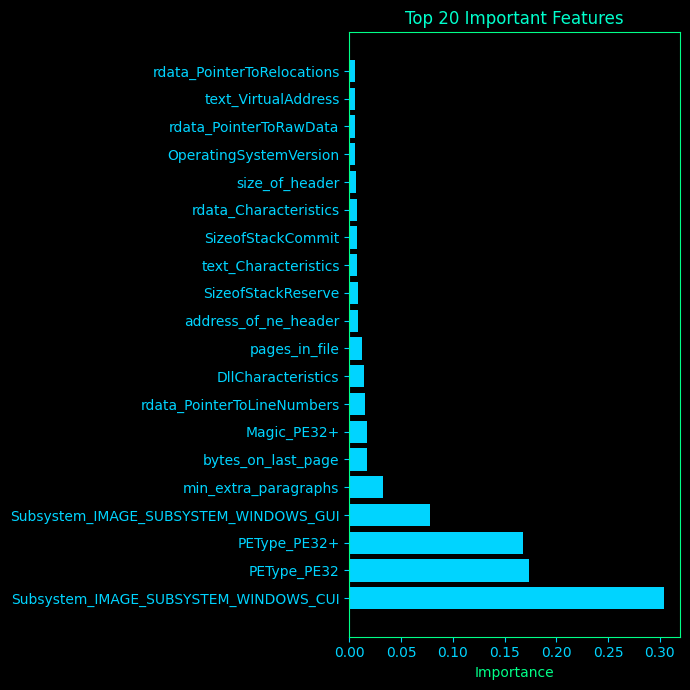

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

fi = pd.read_csv("models/static_feature_importance.csv")

top_fi = fi.head(20)

plt.figure(figsize=(7,7))
plt.barh(top_fi['feature'], top_fi['importance'], color="#00d4ff")
plt.title("Top 20 Important Features")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()
